## Preguntas

* Cual es la importancia de pre procesar los conjuntos de datos?

### Datos perdidos

* Cual es la importancia de tratar los valores perdidos?

### Identificando valores perdidos en datos tabulares


In [1]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,, 8.0
10.0, 11.0, 12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### Eliminando ejemplos o variables con valores perdidos

In [3]:
df.dropna(axis = 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(subset = ['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


* Cuáles son las desventajas de este método?

### Imputar valores perdidos


In [8]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

* Qué otros métodos hay para el parámetro `strategy`?


In [9]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


Leer [imputación](https://scikit-learn.org/stable/modules/impute.html)

* Qué otras imputaciones hay?
* Cual sería mejor?

## Entendiendo la API estimator de scikit-learn

* Qué es el API transfomador?
* Cuales son los dos métodos importantes?
* Qué hacen los dos métodos?

## Manejando datos categóricos

* Qué son variables ordinales y nominales?

### Codificación de datos categóricos con pandas


In [10]:
df = pd.DataFrame([
    ['verde', 'M', 10.1, 'clase2'],
    ['rojo', 'L', 13.5, 'clase1'],
    ['azul', 'XL', 15.3, 'clase2']])
df.columns = ['color', 'tamaño', 'precio', 'etiqueta_clase']
df


,color,tamaño,precio,etiqueta_clase
0,verde,M,10.1,clase2
1,rojo,L,13.5,clase1
2,azul,XL,15.3,clase2


* Cual es el tipo de cada columna?

### Mapeando variables ordinales

* Para qué tenemos que mapear las variables ordinales a números?


In [11]:
mapeado_tamano = {'XL': 3,
                  'L': 2,
                  'M': 1}

df['tamaño'] = df['tamaño'].map(mapeado_tamano)
df

,color,tamaño,precio,etiqueta_clase
0,verde,1,10.1,clase2
1,rojo,2,13.5,clase1
2,azul,3,15.3,clase2


In [12]:
mapeado_inv = {v: k for k, v in mapeado_tamano.items()}
df['tamaño'].map(mapeado_inv)

0     M
1     L
2    XL
Name: tamaño, dtype: object

### Codificando las etiquetas de clase

* Para qué codificamos las etiquetas de clase?
* Cual es la diferencia con la codificación que hicimos antes?



In [13]:
mapeado_clase = {etiqueta: idx for idx, etiqueta in
                 enumerate(np.unique(df['etiqueta_clase']))}
mapeado_clase

{'clase1': 0, 'clase2': 1}

In [14]:
df['etiqueta_clase'] = df['etiqueta_clase'].map(mapeado_clase)
df

,color,tamaño,precio,etiqueta_clase
0,verde,1,10.1,1
1,rojo,2,13.5,0
2,azul,3,15.3,1


In [15]:
inv_mapeado_clase = {v: k for k, v in mapeado_clase.items()}
df['etiqueta_clase'] = df['etiqueta_clase'].map(inv_mapeado_clase)
df

,color,tamaño,precio,etiqueta_clase
0,verde,1,10.1,clase2
1,rojo,2,13.5,clase1
2,azul,3,15.3,clase2


In [16]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['etiqueta_clase'].values)
y

array([1, 0, 1])

In [17]:
class_le.inverse_transform(y)

array(['clase2', 'clase1', 'clase2'], dtype=object)

### Haciendo codificación one-hot
  

In [18]:
X = df[['color', 'tamaño', 'precio']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[2, 1, 10.1],
       [1, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

* Qué problema tiene la codificación anterior de color?
* Qué es la codificación one hot?

In [19]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'tamaño', 'precio']].values
color_one = OneHotEncoder()
color_one.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [20]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'tamaño', 'precio']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  0. ,  1. ,  1. , 10.1],
       [ 0. ,  1. ,  0. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [21]:
pd.get_dummies(df[['color', 'tamaño', 'precio']])

,tamaño,precio,color_azul,color_rojo,color_verde
0,1,10.1,False,False,True
1,2,13.5,False,True,False
2,3,15.3,True,False,False


* Qué problema aparece cuando hacemos esta codificación?
* Cómo se resuelve?

In [22]:
pd.get_dummies(df[['color', 'tamaño', 'precio']],
               drop_first=True)

,tamaño,precio,color_rojo,color_verde
0,1,10.1,False,True
1,2,13.5,True,False
2,3,15.3,False,False


In [23]:
color_ohe = OneHotEncoder(categories='auto', drop = 'first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nada', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  1. , 10.1],
       [ 1. ,  0. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

* Qué otros esquemas existen para la codificación de variables nominales?

Leer [codificacion](https://contrib.scikit-learn.org/category_encoders/)

### Opcional: codificación de variables ordinales

* Por qué es opcional?


In [24]:
df = pd.DataFrame([
    ['verde', 'M', 10.1, 'clase2'],
    ['rojo', 'L', 13.5, 'clase1'],
    ['azul', 'XL', 15.3, 'clase2']])
df.columns = ['color', 'tamaño', 'precio', 'etiqueta_clase']

In [25]:
df['x > M'] = df['tamaño'].apply(
    lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['tamaño'].apply(
    lambda x: 1 if x == 'XL' else 0)
del df['tamaño']
df

,color,precio,etiqueta_clase,x > M,x > L
0,verde,10.1,clase2,0,0
1,rojo,13.5,clase1,1,0
2,azul,15.3,clase2,1,1


## Dividir un conjunto de datos en entrenamiento y prueba

Se usa el conjunto de datos de vino que consiste en 178 ejemplos de vino con 13 variables describiendo sus propiedades químicas.



In [26]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/'
                      'wine/wine.data', header = None)

In [29]:
df_wine.columns = ['etiqueta_clase', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'proanthocyanins', 'Color intensity', 'Hue', '0D280/OD315 of diluted wines', 'Proline']
print('Etiquetas de clase', np.unique(df_wine['etiqueta_clase']))
df_wine.head()

Etiquetas de clase [1 2 3]


,etiqueta_clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,proanthocyanins,Color intensity,Hue,0D280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size = 0.3,
                     random_state = 0,
                     stratify = y)

* Para qué se divide en entrenamiento y prueba?
* Qué afecta el tamaño del conjunto de prueba?

## LLevando todas las variables a la misma escala

* Para qué sirve escalar las variables?
* Qué algoritmos no lo necesitan?
* Qué es normalización y estandarización?

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

* Cuando es útil la normalización?
* Cuando es mejor la estandarización?


In [32]:
ej = np.array([0, 1, 2, 3, 4, 5])
print('Estandarizado:', (ej - ej.mean()) / ej.std())
print('Normalizado:', (ej - ej.min()) / (ej.max() - ej.min()))

Estandarizado: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalizado: [0.  0.2 0.4 0.6 0.8 1. ]


In [33]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Leer [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

* Cómo funciona y en qué casos es mejor usarlo?

## Seleccionando variables importantes

* Qué es sobre ajuste?
* Cuales son las razones y las soluciones al sobreajuste?


### Regularización L1 y L2 como penalidad en contra de la complejidad del modelo

* Qué son estas regularizaciones y cómo se definen?
* Como funcionan?
* Cuando son útiles?
* Explicalos de forma geométrica, en qué se diferencian?


In [34]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = 'l1',
                   solver = 'liblinear',
                   multi_class = 'ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [35]:
lr = LogisticRegression(penalty = 'l1',
                        C = 1.0,
                        solver = 'liblinear',
                        multi_class = 'ovr')
lr.fit(X_train_std, y_train)
print('Exactitud de entrenamiento:', lr.score(X_train_std, y_train))
print('Exactitud de prueba:', lr.score(X_test_std, y_test))

Exactitud de entrenamiento: 1.0
Exactitud de prueba: 1.0


In [36]:
lr.intercept_

array([-1.26309992, -1.21577868, -2.37070648])

In [37]:
lr.coef_

array([[ 1.24553781,  0.18060623,  0.74227105, -1.16001866,  0.        ,
         0.        ,  1.1740289 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54240505,  2.51126438],
       [-1.53773196, -0.38666032, -0.9953314 ,  0.36449795, -0.05935819,
         0.        ,  0.66781087,  0.        ,  0.        , -1.93329828,
         1.23518443,  0.        , -2.23223191],
       [ 0.13579288,  0.16884891,  0.35727081,  0.        ,  0.        ,
         0.        , -2.43753967,  0.        ,  0.        ,  1.56333447,
        -0.8183009 , -0.49359014,  0.        ]])

* Como es la fórmula de estos interceptos y coeficientes?
* Qué pasa con los coeficientes si aumentamos el parámetro de regularización?

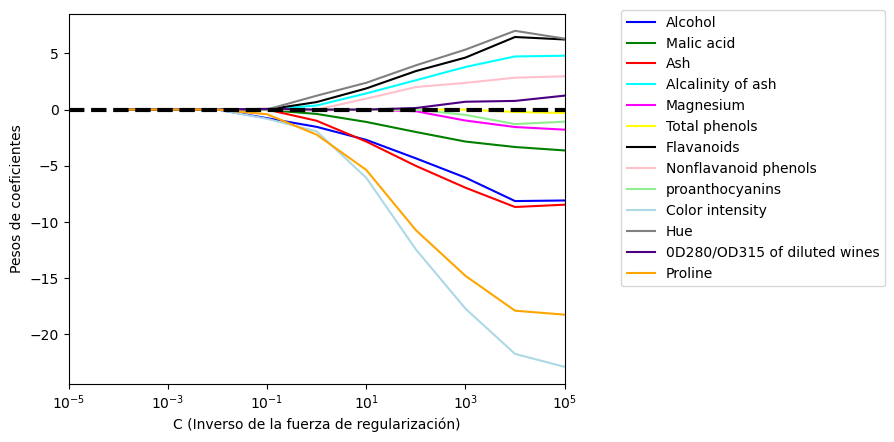

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink',
          'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty = 'l1', C = 10.**c,
                            solver = 'liblinear',
                            multi_class = 'ovr', random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label = df_wine.columns[column + 1],
             color = color)
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Pesos de coeficientes')
plt.xlabel('C (Inverso de la fuerza de regularización)')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center',
          bbox_to_anchor = (1.38, 1.03),
          ncol = 1, fancybox = True)
plt.show()

* Qué podemos decir de esta gráfica?

### Algoritmo de selección de variables secuencial

* Qué es la reducción de dimensionalidad?
* Qué es selección de variables y extracción de variables?
* Qué es la selección de variables secuencial?
* Qué es el algoritmo SBS (Sequential backward selection)
* Qué es un algoritmo de busqueda greedy y exhaustivo?
* Explicar el algoritmo SBS

In [44]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

class SBS:
    def __init__(self, estimator, k_features,
                 scoring = accuracy_score,
                 test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size = self.test_size,
                             random_state = self.random_state)
        
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r = dim -1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

* Explicar paso por paso el código anterior

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

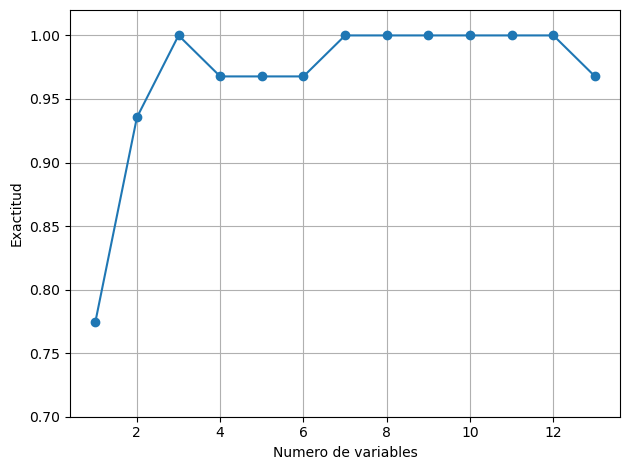

In [45]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.02])
plt.ylabel('Exactitud')
plt.xlabel('Numero de variables')
plt.grid()
plt.tight_layout()
plt.show()

* Qué es la maldición de la dimensionalidad?

In [46]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', '0D280/OD315 of diluted wines'], dtype='object')


In [47]:
knn.fit(X_train_std, y_train)
print('Exactitud de entrenamiento:', knn.score(X_train_std, y_train))
print('Exactitud de prueba:', knn.score(X_test_std, y_test))

Exactitud de entrenamiento: 0.967741935483871
Exactitud de prueba: 0.9629629629629629


In [48]:
knn.fit(X_train_std[:, k3], y_train)
print('Exactitud de entrenamiento:', knn.score(X_train_std[:, k3], y_train))
print('Exactitud de prueba:', knn.score(X_test_std[:, k3], y_test))

Exactitud de entrenamiento: 0.9516129032258065
Exactitud de prueba: 0.9259259259259259


* Qué podemos concluir?
* Qué otro métodos hay para la selección de variables?

[Seleccion de variables](http://scikit-learn.org/stable/modules/feature_selection.html)

### Midiendo la importancia de las variables con random forest

* Como funciona este método?

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


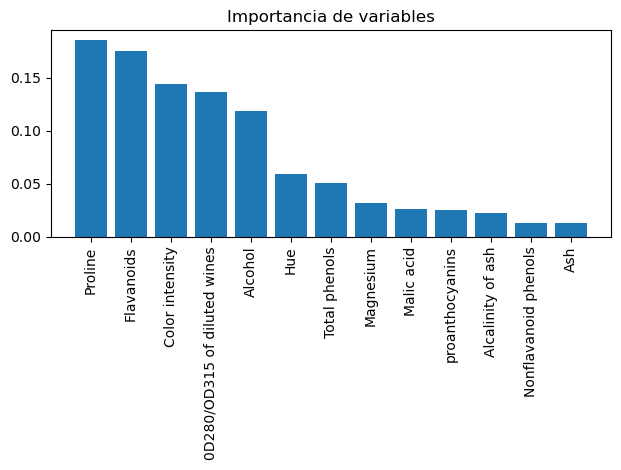

In [49]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 500,
                                random_state = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
plt.title('Importancia de variables')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align = 'center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

* Qué podemos concluir?
* Qué problema tiene este método?

In [51]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)
print("Numero de variables que pasan el criterio limite", "Criterio:", X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
          feat_labels[indices[f]],
          importances[indices[f]]))

Numero de variables que pasan el criterio limite Criterio: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
